In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

400

In [6]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'bagels'
location = 'Hoboken'
SEARCH_LIMIT = 20

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_bagels = requests.get(url, headers=headers, params=url_params)

In [6]:
print(response_bagels)

<Response [200]>


In [6]:
# print(response_bagels.text)

In [7]:
bagels = response_bagels.text

In [8]:
bagels = json.loads(bagels)
print(type(bagels))

<class 'dict'>


In [10]:
# bagels

In [10]:
for key in bagels.keys():
    print(key)

businesses
total
region


In [12]:
bagels['businesses'][0]

{'id': 'ue0fG3vQkKpa9HheKVZFvA',
 'alias': 'levend-bagelry-boston-2',
 'name': 'Levend Bagelry',
 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/0YTeRWCB7o1ELlgSwkXpXw/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/levend-bagelry-boston-2?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA',
 'review_count': 94,
 'categories': [{'alias': 'bagels', 'title': 'Bagels'},
  {'alias': 'bakeries', 'title': 'Bakeries'}],
 'rating': 4.0,
 'coordinates': {'latitude': 42.3619511, 'longitude': -71.057115},
 'transactions': ['delivery'],
 'price': '$',
 'location': {'address1': '100 Hanover St',
  'address2': '',
  'address3': None,
  'city': 'Boston',
  'zip_code': '02108',
  'country': 'US',
  'state': 'MA',
  'display_address': ['100 Hanover St', 'Boston, MA 02108']},
 'phone': '+16179456123',
 'display_phone': '(617) 945-6123',
 'distance': 1964.3340646289942}

In [14]:
bagels['total']

1100

In [15]:
bagels['region']

{'center': {'longitude': -71.07124328613281, 'latitude': 42.34784169448538}}

In [10]:
#making the bagels dictionary a dataframe
bagels_df = pd.DataFrame.from_dict(bagels['businesses'])

In [11]:
bagels_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance'],
      dtype='object')

In [12]:
df = bagels_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']]

In [13]:
df

,name,rating,review_count,price,location
0,O'Bagel,3.5,431,$,"{'address1': '600 Washington St', 'address2': ..."
1,Bagels On The Hudson,2.5,309,$,"{'address1': '802 Washington St', 'address2': ..."
2,Hoboken Hot Bagels,3.5,210,$,"{'address1': '634 Washington St', 'address2': ..."
3,JP's Bagel Express,3.5,179,$,"{'address1': '52 Newark St', 'address2': '', '..."
4,Hidden Grounds Coffee,4.0,56,$$,"{'address1': '700 Garden St', 'address2': '', ..."
5,Black Rail Coffee,4.5,150,$,"{'address1': '800 Jackson St', 'address2': Non..."
6,The Little Grocery,3.5,97,$$,"{'address1': '1212 Washington St', 'address2':..."
7,Hidden Grounds Coffee,4.0,162,$,"{'address1': '79 Hudson St', 'address2': None,..."
8,Alessio's Cafe | Gelato | Pizza,4.5,76,NaN,"{'address1': '539 Park Ave', 'address2': None,..."
9,Boogie Woogie Bagel Boys,3.0,13,$,"{'address1': '1200 Harbor Blvd', 'address2': '..."


In [14]:
df = df.sort_values('rating', ascending = False)
df

,name,rating,review_count,price,location
11,Bagel,5.0,2,NaN,"{'address1': '1445 John F Kennedy Blvd', 'addr..."
13,Cafe Panino Mucho Giusto,4.5,121,$$,"{'address1': '551 Hudson St', 'address2': '', ..."
5,Black Rail Coffee,4.5,150,$,"{'address1': '800 Jackson St', 'address2': Non..."
8,Alessio's Cafe | Gelato | Pizza,4.5,76,NaN,"{'address1': '539 Park Ave', 'address2': None,..."
15,Blackstone Coffee Roasters,4.5,114,$$,"{'address1': '502 Hudson St', 'address2': '', ..."
18,Rosticeria Da Gigi,4.0,225,$$,"{'address1': '916 Washington St', 'address2': ..."
17,GFG Bakery Cafe,4.0,149,$$,"{'address1': '221 River St', 'address2': '', '..."
4,Hidden Grounds Coffee,4.0,56,$$,"{'address1': '700 Garden St', 'address2': '', ..."
7,Hidden Grounds Coffee,4.0,162,$,"{'address1': '79 Hudson St', 'address2': None,..."
14,Little Market,4.0,33,$,"{'address1': '400 Newark St', 'address2': None..."


[None]

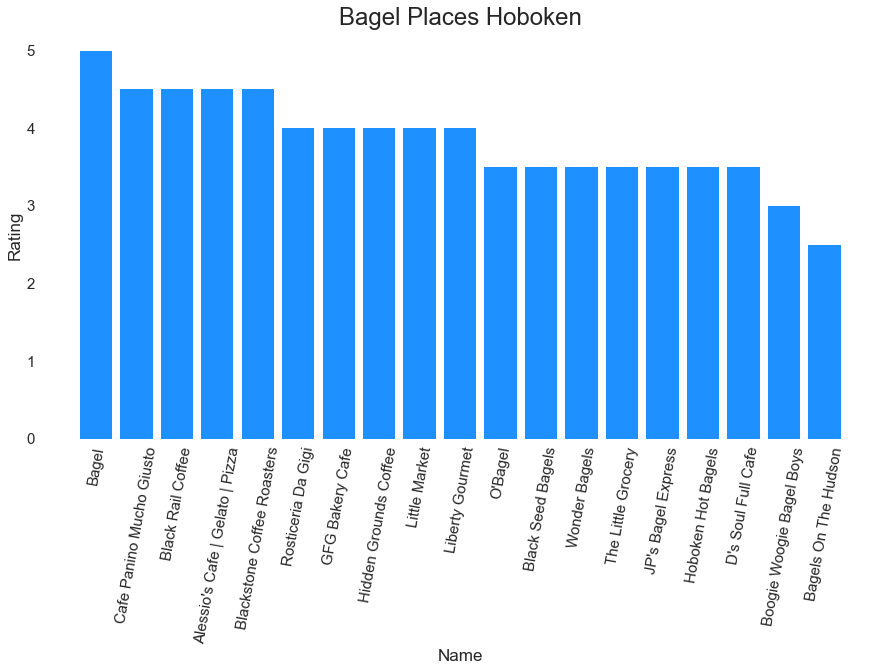

In [26]:
fig, ax = plt.subplots(figsize = (15,7.5))
x = df['name'][:25]
y = df['rating'][:25]
ax.set_xlabel('Name', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Bagel Places Hoboken', fontsize = 24)
plt.xticks(rotation=80, fontsize = 15)
plt.yticks(fontsize=15)
ax.bar(x,y, color = 'dodgerblue')
ax.set(facecolor = "white")

# plt.savefig('../data/Hoboken_Bagels')

In [40]:
# MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'coffee'
location = 'hoboken'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_coffee = requests.get(url, headers=headers, params=url_params)

In [41]:
response_coffee

<Response [200]>

In [42]:
coffee = response_coffee.text

In [31]:
# json.loads(coffee)

In [9]:
for key in json.loads(coffee).keys():
    print(key)

businesses
total
region


In [43]:
coffee_df = pd.DataFrame.from_dict(json.loads(coffee)['businesses'])

In [45]:
coffee_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,Vdms7GjK3F3bls8kJkC48A,bwè-kafe-hoboken,Bwè Kafe,https://s3-media1.fl.yelpcdn.com/bphoto/OWRjMv...,False,https://www.yelp.com/biz/bw%C3%A8-kafe-hoboken...,287,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,"{'latitude': 40.7487255334854, 'longitude': -7...","[pickup, delivery]",$,"{'address1': '1002 Washington St', 'address2':...",+12016830045,(201) 683-0045,575.307472
1,bZ-CEEl6li6LyCv6vnRvnQ,mojo-coffee-company-hoboken,Mojo Coffee Company,https://s3-media2.fl.yelpcdn.com/bphoto/bB4p_T...,False,https://www.yelp.com/biz/mojo-coffee-company-h...,46,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",5.0,"{'latitude': 40.740506, 'longitude': -74.033981}",[delivery],NaN,"{'address1': '230 Willow Ave', 'address2': Non...",+12016833449,(201) 683-3449,496.307866
2,ORU3eWuOMu8Qms8VcgrhUw,the-hive-hoboken,The Hive,https://s3-media4.fl.yelpcdn.com/bphoto/tUUdOO...,False,https://www.yelp.com/biz/the-hive-hoboken?adju...,38,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,"{'latitude': 40.74934171665144, 'longitude': -...","[pickup, delivery]",$$,"{'address1': '1000 Park Ave', 'address2': '', ...",,,540.127609
3,uGQnSwJEOHphJzDIc3MWxg,jeffersons-coffee-hoboken-6,Jefferson's Coffee,https://s3-media1.fl.yelpcdn.com/bphoto/ttF8sv...,False,https://www.yelp.com/biz/jeffersons-coffee-hob...,50,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,"{'latitude': 40.7432211, 'longitude': -74.0293...","[pickup, delivery]",$$,"{'address1': '534 Washington St', 'address2': ...",+12016834800,(201) 683-4800,238.144162
4,zdwdNaOiI6MeJKJKlIRqRQ,hidden-grounds-coffee-hoboken-4,Hidden Grounds Coffee,https://s3-media1.fl.yelpcdn.com/bphoto/xwkwa-...,False,https://www.yelp.com/biz/hidden-grounds-coffee...,56,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 40.74518, 'longitude': -74.03059}","[pickup, delivery]",$$,"{'address1': '700 Garden St', 'address2': '', ...",+18483083645,(848) 308-3645,109.009566


In [46]:
df_coffee = coffee_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']].sort_values('rating', ascending = False)

In [47]:
df_coffee.head()

,name,rating,review_count,price,location
31,Griot Cafe,5.0,228,$$,"{'address1': '398 Central Ave', 'address2': ''..."
36,Lil' dove cafe,5.0,13,NaN,"{'address1': '589 Palisade Ave', 'address2': '..."
1,Mojo Coffee Company,5.0,46,NaN,"{'address1': '230 Willow Ave', 'address2': Non..."
0,Bwè Kafe,4.5,287,$,"{'address1': '1002 Washington St', 'address2':..."
21,Joboken Cafe,4.5,25,NaN,"{'address1': '54 Hudson Pl', 'address2': '', '..."


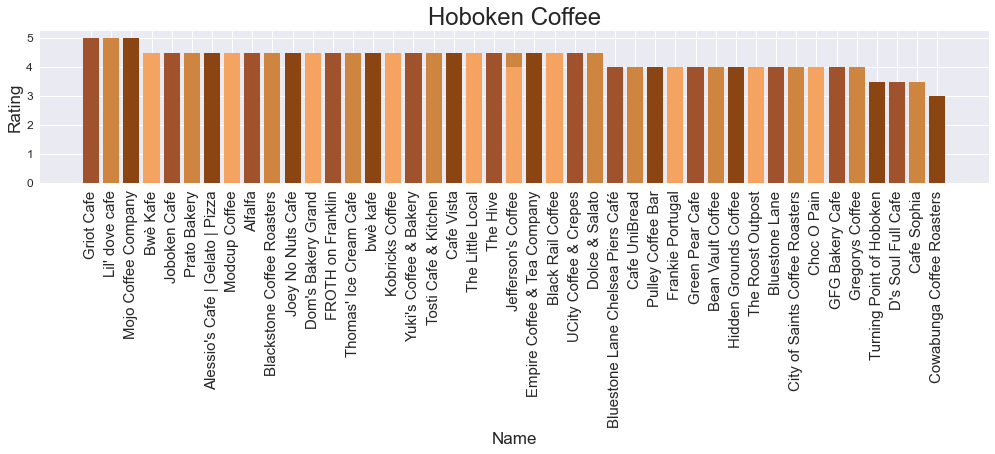

In [51]:
fig, ax = plt.subplots(figsize = (17,2.8))
x = df_coffee['name'][:47]
y = df_coffee['rating'][:47]
ax.set_xlabel('Name', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Hoboken Coffee', fontsize = 24)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize=12)
ax.bar(x,y, color = ['sienna', 'peru', 'saddlebrown', 'sandybrown'])

plt.savefig('../data/hoboken_coffee')

In [52]:
term = 'museum'
location = 'Hoboken'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
museum_response = requests.get(url, headers=headers, params=url_params)

In [53]:
museum = json.loads(museum_response.text)

In [54]:
type(museum_response.text)

str

In [56]:
# museum

In [9]:
museum.keys()

dict_keys(['businesses', 'total', 'region'])

In [57]:
museum_df = pd.DataFrame.from_dict(json.loads(museum_response.text)['businesses'])

In [58]:
museum = museum_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']].sort_values('rating', ascending = False)

In [59]:
museum.head(5)

,name,rating,review_count,price,location
25,Real New York Tours,5.0,124,NaN,"{'address1': None, 'address2': None, 'address3..."
34,Nyc Horse Carriage Rides,5.0,113,NaN,"{'address1': '180 Central Park S', 'address2':..."
26,Scott's Pizza Tours,5.0,342,$$,"{'address1': '', 'address2': '', 'address3': '..."
28,Readings With Dannah Chaifetz,5.0,5,NaN,"{'address1': '', 'address2': None, 'address3':..."
29,Free Tours by Foot,5.0,526,NaN,"{'address1': '112 Suffolk St', 'address2': '',..."


<BarContainer object of 30 artists>

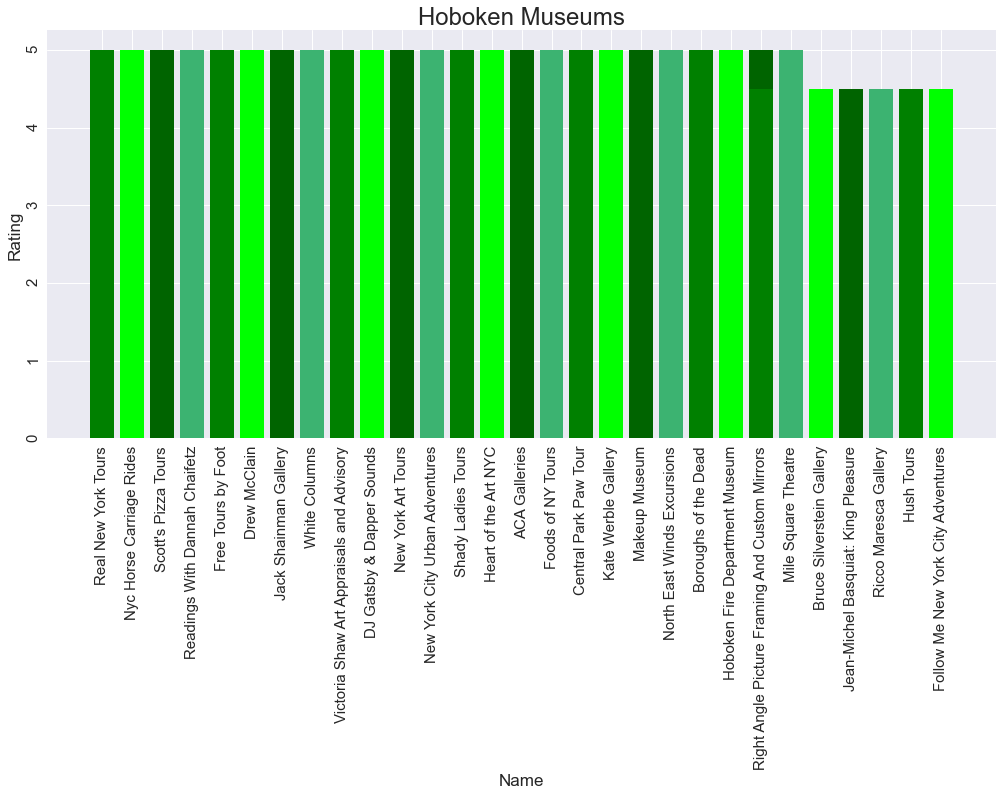

In [63]:
fig, ax = plt.subplots(figsize = (17,7.5))
x = museum['name'][:30]
y = museum['rating'][:30]
ax.set_xlabel('Name', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Hoboken Museums', fontsize = 24)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(rotation=90, fontsize = 15)
ax.bar(x,y, color = ['green', 'lime', 'darkgreen', 'mediumseagreen'])

# plt.savefig('../data/HobokenMuseum')

In [64]:
term = 'bathroom'
location = 'Hoboken'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
bathroom_response = requests.get(url, headers=headers, params=url_params)

In [65]:
bathroom = json.loads(bathroom_response.text)

In [66]:
bathroom_df = pd.DataFrame.from_dict(json.loads(bathroom_response.text)['businesses'])

In [67]:
bathroom = bathroom_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']].sort_values('rating', ascending = False)

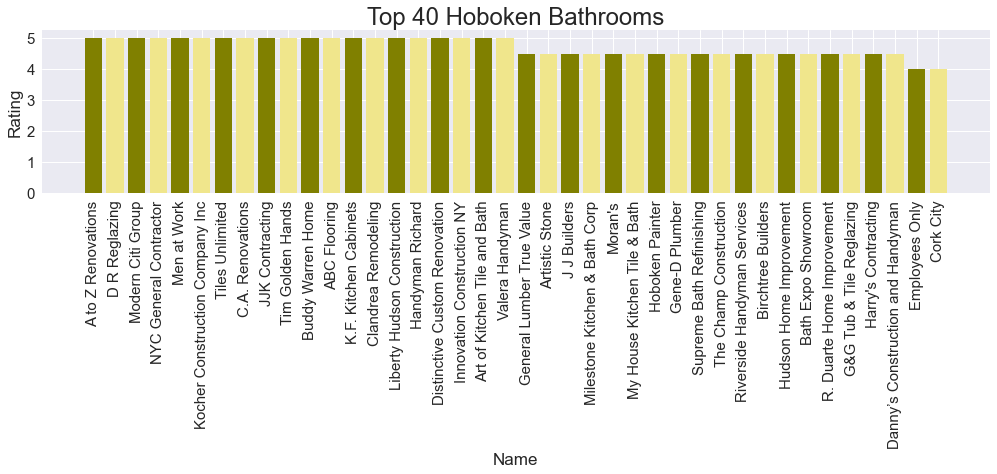

In [70]:
fig, ax = plt.subplots(figsize = (17,2.99))
x = bathroom['name'][:40]
y = bathroom['rating'][:40]
ax.set_xlabel('Name', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Top 40 Hoboken Bathrooms', fontsize = 24)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize=15)
ax.bar(x,y, color = ['olive', 'khaki'])

# plt.savefig('../data/Hoboken_bathrooms')

In [7]:
term = 'Mexican'
location = 'NYC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
margaritas_response = requests.get(url, headers=headers, params=url_params)

In [8]:
margaritas = json.loads(margaritas_response.text)

In [9]:
margaritas = pd.DataFrame.from_dict(margaritas['businesses'])

In [10]:
margaritas = margaritas[['name', 'rating', 'review_count', 'price', 'location']].sort_values('rating', ascending = False)

In [11]:
#cheapest coffee places
# margaritas[margaritas['price'].str.len() == 2]

<BarContainer object of 41 artists>

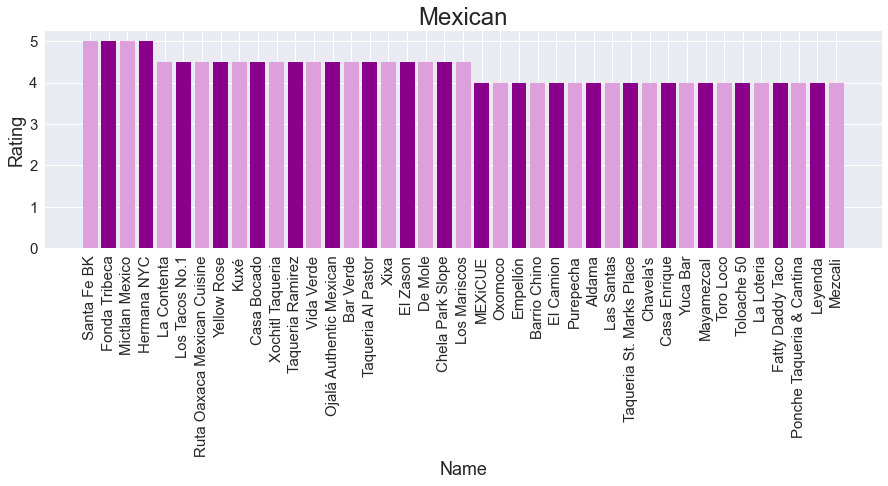

In [13]:
fig, ax = plt.subplots(figsize = (15, 4))
x = margaritas['name'][:41]
y = margaritas['rating'][:41]
ax.set_xlabel('Name', fontsize = 18)
ax.set_ylabel('Rating', fontsize = 18)
ax.set_title('Mexican', fontsize = 24)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize=15)
plt.bar(x,y, color = ['plum', 'darkmagenta'])

# plt.savefig('../data/coffee_dc.png')

In [15]:
margaritas.reset_index(drop=True)

,name,rating,review_count,price,location
0,Giacinta’s Gelato And Cafe,5.0,1,NaN,"{'address1': '166 E Main St', 'address2': '', ..."
1,Mugshots,5.0,6,NaN,"{'address1': '1109 Main St', 'address2': '', '..."
2,Mary's Kitchen - Opening Soon,5.0,1,NaN,"{'address1': None, 'address2': None, 'address3..."
3,Sarah’s On Main,5.0,23,NaN,"{'address1': '2122 Main St', 'address2': '', '..."
4,Timi’s Cafe,5.0,2,NaN,"{'address1': '201 S Main St', 'address2': '', ..."
5,Schlepp's,4.5,46,$,"{'address1': '66645 Belmont Morristown Rd', 'a..."
6,Good Mansion Wines,4.5,35,$$,"{'address1': '95 14th St', 'address2': None, '..."
7,Hightower Brewing Company,4.5,10,NaN,"{'address1': '3445 County Rd 16', 'address2': ..."
8,Newellstown Diner,4.0,20,$,"{'address1': '145 W Main St', 'address2': '', ..."
9,Sakura Family Restaurant,4.0,4,NaN,"{'address1': '3293 Belmont St', 'address2': ''..."
